# Predicting Online Shopper's Intention

Take the following approach:

1. Problem definition
2. Data
3. Evaluation

## 1. Problem Definition

In a statement,
> Given a user's session information, can we predict whether or not the user will purchase from the online shop?

## 2. Data

The original data came from Kaggle.
https://www.kaggle.com/roshansharma/online-shoppers-intention


## 3. Evaluation

> If we can reach 90% accuracy at predicting whether or not a user will purchase from the online shop, we will pursue the project.


#### Data Set Information
The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
https://www.kaggle.com/roshansharma/online-shoppers-intention

#### Attribute Information

*This can also be found in https://www.kaggle.com/roshansharma/online-shoppers-intention*

The dataset consists of 10 numerical and 8 categorical attributes.
The 'Revenue' attribute can be used as the class label.
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

#### Data dictionary

* Administrative - how many administrative pages the user visited in that session
* Administrative Duration - total time spent in administrative pages
* Informational- how many informational pages the user visited in that session
* Informational Duration - total time spent in informational pages
* Product Related- how many product-related pages the user visited in that session
* Product Related Duration -  total time spent in product related pages
* Bounce Rates - percentage of visitors who enter the site from that page and leaves without triggering any other requests to the analytics server during the session
* Exit Rates - number of people are exiting a site on a particular page relative to the number of people who are visiting that same page
* Page Values - the average value for a page that a user visited before landing on the goal page or completing an Ecommerce transaction (or both)
* Special Day - how close the site visit is to a special day (Valentine's Day, Christmas, etc.)
* Month
* Opearating Systems
* Browser
* Region
* Traffic Type
* Visitor Type
* Weekend
* Revenue - whether or not the user will purchase an item/service

In [1]:
# Import all the tools we need

# Regular exploratory data analysis and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve

# Imbalance learn package
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [2]:
# Load data
df = pd.read_csv('online_shoppers_intention.csv')
df.shape #rows, columns

(12330, 18)

### Data Exploration (EDA)

In this section, we want to find out more about the data, and learn more about the dataset that we are working with. To do this, we want to answer the following questions:

1. What questions are you trying to solve? *We are trying to answer the following question: Given a user's session information, can we predict whether or not the user will purchase from the online shop?*
2. What kind of data do we have and how do we treat different types? *Our data consists of both numerical and categorical data*
3. What's missing from the data and how do you deal with it? *We will pre-process the data to resolve the missing data*
4. Is the dataset balanced? If not, how can that affect the model? How do you deal with it? *If the dataset is imbalanced, some evaluation metric might not be accurate. To resolve this, we can undersample the dataset*


In [3]:
# Let's find out how many of each class there are
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

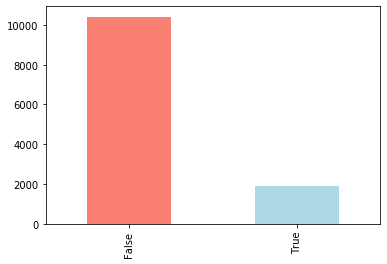

In [4]:
df.Revenue.value_counts().plot(kind = 'bar',
                               color = ['salmon', 'lightblue'])

This graph shows we have an imbalanced dataset. Imbalanced dataset causes poor performance models. To resolve this, we can use the imbalance-learn package to perform undersampling. But before that, we need to examine and prepare our dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.isna().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

As shown above, not all of our columns are numerical - some columns are categorical, which makes modeling challenging. We are also missing some data in our dataset. Thus, we need to preprocess this dataset so that we fill missing data and convert the categorical columns to numerical.

### Data Preparation
In this section, we will preprocess the data to convert all string/categorical fields to numerical, as well as fill their missing values. We will also undersample our imbalanced dataset to create a balanced dataset.

In [10]:
def preprocess_data(df_):
    """
    Performs transformations on df and returns transformed df.
    
    This function should:
        1) Turns the string values into categories - each category is then assigned a number.
        2) Fills the missing data
            a) Adds a new boolean column (%_missing) for missing columns.
            b) fills out the missing data with median if column is numerical, and 1 if column is categorical.
            
    Parameters: df_: dataframe to preprocess
    
    Returns: df_: processed dataframe
    """
    for label, content in df_.items():
        # Checks if column is a string
        if pd.api.types.is_string_dtype(content):
            # turns the string value into categories. each category is assigned a number
            df_[label] = content.astype('category').cat.as_ordered()
        # Checks if column is numeric
        if pd.api.types.is_numeric_dtype(content):
            # check if column has null rows
            if pd.isnull(content).sum():
                # add a binary column which tells us if the data was missing
                df_[label + '_is_missing'] = pd.isnull(content)
                # Fill missing values with median
                df_[label] = content.fillna(content.median())
        if not pd.api.types.is_numeric_dtype(content):
            # if there are null values, add 1 
            df_[label+'_is_missing'] = pd.isnull(content)
            df_[label] = pd.Categorical(content).codes + 1
    return df_                

In [11]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
Administrative,0,0,0,0,0,0,0,1,0,0,...,0,0,6,2,0,3,0,0,4,0
Administrative_Duration,0,0,-1,0,0,0,-1,-1,0,0,...,0,0,76.25,64.75,0,145,0,0,75,0
Informational,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Informational_Duration,0,0,-1,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
ProductRelated,1,2,1,2,10,19,1,1,2,3,...,8,6,22,44,16,53,5,6,15,3
ProductRelated_Duration,0,64,-1,2.66667,627.5,154.217,-1,-1,37,738,...,143.583,0,1075.25,1157.98,503,1783.79,465.75,184.25,346,21.25
BounceRates,0.2,0,0.2,0.05,0.02,0.0157895,0.2,0.2,0,0,...,0.0142857,0.2,0,0,0,0.00714286,0,0.0833333,0,0
ExitRates,0.2,0.1,0.2,0.14,0.05,0.0245614,0.2,0.2,0.1,0.0222222,...,0.05,0.2,0.00416667,0.0139535,0.0376471,0.0290306,0.0213333,0.0866667,0.0210526,0.0666667
PageValues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12.2417,0,0,0,0
SpecialDay,0,0,0,0,0,0,0.4,0,0.8,0.4,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_p = preprocess_data(df)

In [13]:
df_p.T

,0,1,2,3,4,5,6,7,8,9,...,12320,12321,12322,12323,12324,12325,12326,12327,12328,12329
Administrative,0,0,0,0,0,0,0,1,0,0,...,0,0,6,2,0,3,0,0,4,0
Administrative_Duration,0,0,-1,0,0,0,-1,-1,0,0,...,0,0,76.25,64.75,0,145,0,0,75,0
Informational,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Informational_Duration,0,0,-1,0,0,0,-1,-1,0,0,...,0,0,0,0,0,0,0,0,0,0
ProductRelated,1,2,1,2,10,19,1,1,2,3,...,8,6,22,44,16,53,5,6,15,3
ProductRelated_Duration,0,64,-1,2.66667,627.5,154.217,-1,-1,37,738,...,143.583,0,1075.25,1157.98,503,1783.79,465.75,184.25,346,21.25
BounceRates,0.2,0,0.2,0.05,0.02,0.0157895,0.2,0.2,0,0,...,0.0142857,0.2,0,0,0,0.00714286,0,0.0833333,0,0
ExitRates,0.2,0.1,0.2,0.14,0.05,0.0245614,0.2,0.2,0.1,0.0222222,...,0.05,0.2,0.00416667,0.0139535,0.0376471,0.0290306,0.0213333,0.0866667,0.0210526,0.0666667
PageValues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,12.2417,0,0,0,0
SpecialDay,0,0,0,0,0,0,0.4,0,0.8,0.4,...,0,0,0,0,0,0,0,0,0,0


There should not be any more missing values.

In [14]:
df_p.isna().sum()

Administrative                        0
Administrative_Duration               0
Informational                         0
Informational_Duration                0
ProductRelated                        0
ProductRelated_Duration               0
BounceRates                           0
ExitRates                             0
PageValues                            0
SpecialDay                            0
Month                                 0
OperatingSystems                      0
Browser                               0
Region                                0
TrafficType                           0
VisitorType                           0
Weekend                               0
Revenue                               0
Administrative_is_missing             0
Administrative_Duration_is_missing    0
Informational_is_missing              0
Informational_Duration_is_missing     0
ProductRelated_is_missing             0
ProductRelated_Duration_is_missing    0
BounceRates_is_missing                0


There should also only be booleans and numerical datatype.

In [15]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Administrative                      12330 non-null  float64
 1   Administrative_Duration             12330 non-null  float64
 2   Informational                       12330 non-null  float64
 3   Informational_Duration              12330 non-null  float64
 4   ProductRelated                      12330 non-null  float64
 5   ProductRelated_Duration             12330 non-null  float64
 6   BounceRates                         12330 non-null  float64
 7   ExitRates                           12330 non-null  float64
 8   PageValues                          12330 non-null  float64
 9   SpecialDay                          12330 non-null  float64
 10  Month                               12330 non-null  int8   
 11  OperatingSystems                    12330

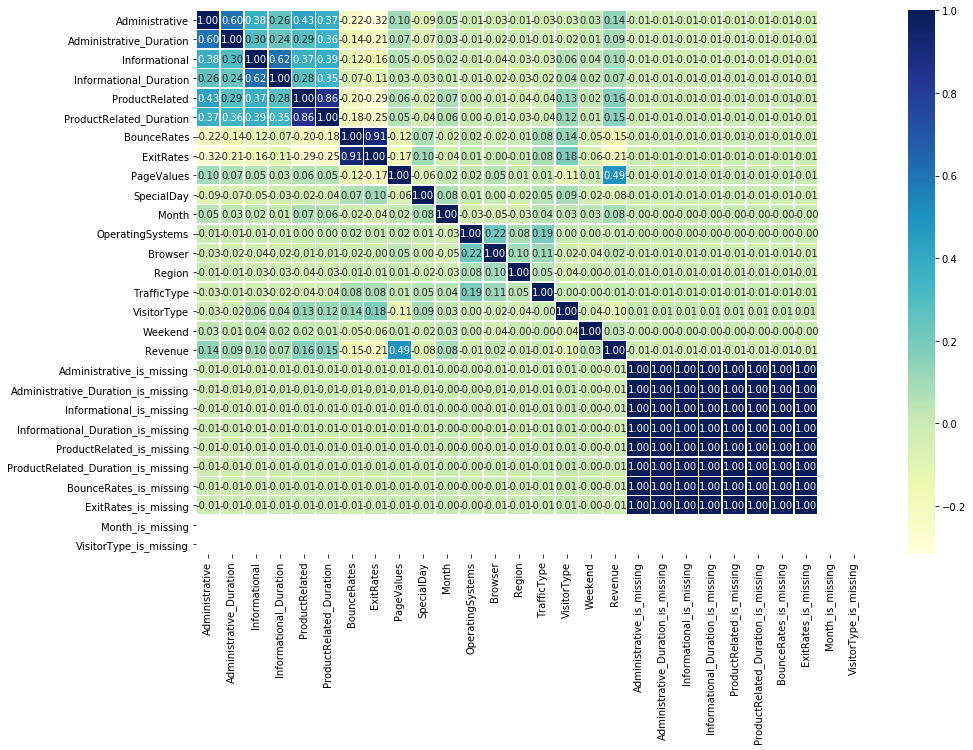

In [16]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True, 
                 linewidths=0.5, 
                 fmt = ".2f",
                 cmap = 'YlGnBu')

Now that the data has been preprocessed, we can split the data into features (X) and label (y).

We can also now split the data into training and testing data.

In [15]:
# Split data into X and y
X = df_p.drop('Revenue', axis = 1)
y = df_p.Revenue

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2)

Also, since we've seen previously that we have an imbalanced data, we need to undersample the data.

In [16]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(False, 1908), (True, 1908)]


Now let's split the undersampled data into training and testing data.

We will train both undersampled and original data and compare their evaluation.

In [17]:
np.random.seed(42)
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_resampled,
                                                                    y_resampled,
                                                                    test_size=0.2)

In [18]:
X_train

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Administrative_is_missing,Administrative_Duration_is_missing,Informational_is_missing,Informational_Duration_is_missing,ProductRelated_is_missing,ProductRelated_Duration_is_missing,BounceRates_is_missing,ExitRates_is_missing,Month_is_missing,VisitorType_is_missing
1785,0.0,0.000000,0.0,0.0,7.0,95.000000,0.014286,0.061905,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
10407,2.0,14.000000,0.0,0.0,81.0,1441.910588,0.002469,0.013933,2.769599,0.0,...,False,False,False,False,False,False,False,False,False,False
286,0.0,0.000000,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
6520,5.0,49.200000,4.0,379.0,5.0,74.600000,0.000000,0.018182,8.326728,0.0,...,False,False,False,False,False,False,False,False,False,False
12251,0.0,0.000000,1.0,5.0,9.0,279.000000,0.040000,0.041667,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,14.0,1005.608333,0.0,0.0,25.0,732.344872,0.000000,0.015676,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
5191,0.0,0.000000,0.0,0.0,14.0,340.000000,0.000000,0.015385,23.388000,0.0,...,False,False,False,False,False,False,False,False,False,False
5390,0.0,0.000000,0.0,0.0,3.0,189.000000,0.000000,0.066667,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False
860,0.0,0.000000,0.0,0.0,13.0,305.000000,0.000000,0.016667,0.000000,0.0,...,False,False,False,False,False,False,False,False,False,False


### Finding the best model for this dataset

In [19]:
models = {'Logistic Regression': LogisticRegression(max_iter = 1000),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models (model)
    
    Parameters:
        models: dictionary of different Scikit model
        X_train: training features
        X_test: test features
        y_train: training labels
        y_test: test labels
    
    Return:
        model_scores: a dictionary containing model scores for each model given.
    """
    np.random.seed(42)
    model_scores = {}
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores


In [20]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

C:\Users\clarisse_vigal\Desktop\CV_Python\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
model_scores_resampled = fit_and_score(models, X_res_train, X_res_test, y_res_train, y_res_test)

C:\Users\clarisse_vigal\Desktop\CV_Python\env\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
model_scores

{'Logistic Regression': 0.8690186536901865,
 'KNN': 0.8495539334955393,
 'Random Forest': 0.894566098945661}

In [23]:
model_scores_resampled

{'Logistic Regression': 0.8259162303664922,
 'KNN': 0.7238219895287958,
 'Random Forest': 0.8547120418848168}

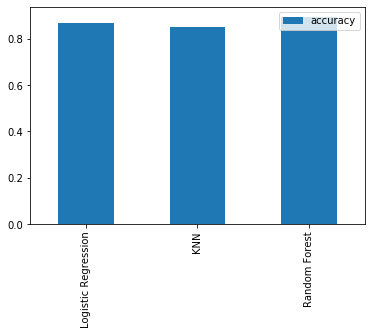

In [24]:
model_compare = pd.DataFrame(model_scores, index = ['accuracy'])
model_compare.T.plot.bar()

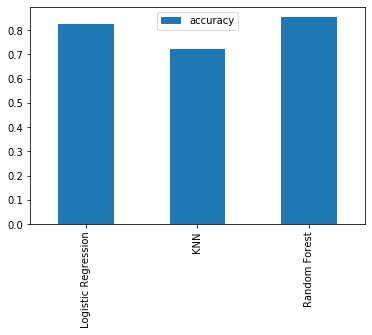

In [25]:
model_compare_res = pd.DataFrame(model_scores_resampled, index = ['accuracy'])
model_compare_res.T.plot.bar()

For both datasets, the RandomForestRegression model produced the highest score.

Let's still tune all three models to see if we can get higher scores.

### Hyperparameter tuning KNN model

In [31]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [32]:
train_scores_res = []
test_scores_res = []

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_res_train, y_res_train)
    
    train_scores_res.append(knn.score(X_res_train, y_res_train))
    test_scores_res.append(knn.score(X_res_test, y_res_test))

Maximum KNN score on the test data: 85.73%


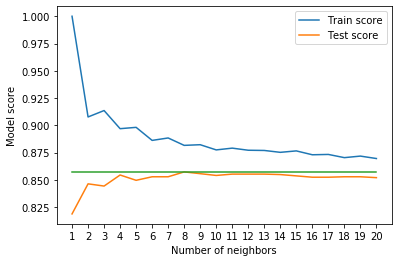

In [33]:
plt.plot(neighbors, train_scores, label = 'Train score')
plt.plot(neighbors, test_scores, label = 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.plot(neighbors, [max(test_scores)]*len(neighbors))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)* 100:.2f}%")
#print(f"Number of neighbors for Maximum KNN score on the test data: {max(test_scores)* 100:.2f}%")

Maximum KNN score on the test data: 72.38%


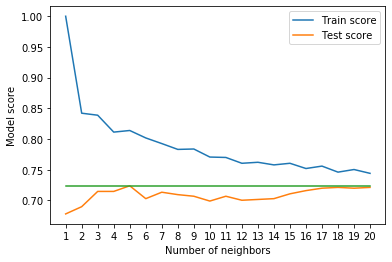

In [30]:
plt.plot(neighbors, train_scores_res, label = 'Train score')
plt.plot(neighbors, test_scores_res, label = 'Test score')
plt.xticks(np.arange(1, 21, 1))
plt.plot(neighbors, [max(test_scores_res)]*len(neighbors))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores_res)* 100:.2f}%")
#print(f"Number of neighbors for Maximum KNN score on the test data: {max(test_scores)* 100:.2f}%")

### Hyperparameter tuning with RandomizedSearchCV
Tune Logistic Regession and RandomForestClassifier using RandomizedSearchCV

In [34]:
# Create a hyperparameter grid for Logistic Regression

log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

rf_grid = {'n_estimators': np.arange(10, 1000, 10),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange (1, 20, 2)}

In [35]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions = log_reg_grid,
                                 cv = 5,
                                 n_iter = 50,
                                 verbose = True)

rs_log_reg.fit(X_train, y_train)

C:\Users\clarisse_vigal\Desktop\CV_Python\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:   31.4s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [36]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.004520353656360241}

In [37]:
rs_log_reg.score(X_test, y_test)

0.8673965936739659

In [38]:
np.random.seed(42)

rs_log_reg_res = RandomizedSearchCV(LogisticRegression(),
                                 param_distributions = log_reg_grid,
                                 cv = 5,
                                 n_iter = 50,
                                 verbose = True)

rs_log_reg_res.fit(X_res_train, y_res_train)

C:\Users\clarisse_vigal\Desktop\CV_Python\env\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 30 is smaller than n_iter=50. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    9.9s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=50,
                   param_distributions={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [39]:
rs_log_reg_res.best_params_

{'solver': 'liblinear', 'C': 32.90344562312671}

In [40]:
rs_log_reg_res.score(X_res_test, y_res_test)

0.831151832460733

In [40]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter=20,
                           verbose=True)

In [41]:
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [42]:
rs_rf.score(X_test, y_test) #0.8929

0.8921330089213301

In [43]:
np.random.seed(42)

rs_rf_res = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv = 5,
                           n_iter=20,
                           verbose=True)

In [44]:
rs_rf_res.fit(X_res_train, y_res_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.5min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   verbose=True)

In [45]:
rs_rf_res.score(X_res_test, y_res_test)

0.8599476439790575

In [46]:
rs_rf.best_params_

{'n_estimators': 750,
 'min_samples_split': 2,
 'min_samples_leaf': 7,
 'max_depth': None}

In [47]:
rs_rf_res.best_params_

{'n_estimators': 580,
 'min_samples_split': 16,
 'min_samples_leaf': 1,
 'max_depth': 10}

## Hyperparameter Tuning with GridSearchCV

In [48]:
# Create a hyperparameter grid for Logistic Regression
rf_grid_revised = {'n_estimators': np.arange(800, 1000, 10),
                   'max_depth': [10],
                   'min_samples_split': np.arange(10, 20, 2),
                   'min_samples_leaf': np.arange (1, 6, 2)}

In [49]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid_revised,
                          cv = 5,
                          verbose=True)

In [50]:
gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 180.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([10, 12, 14, 16, 18]),
                         'n_estimators': array([800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920,
       930, 940, 950, 960, 970, 980, 990])},
             verbose=True)

In [51]:
gs_rf.best_params_
#{'max_depth': 10,
# 'min_samples_leaf': 1,
# 'min_samples_split': 18,
# 'n_estimators': 830}

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 830}

In [52]:
gs_rf.score(X_test, y_test)

0.8929440389294404

In [53]:
gs_rf_res = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid_revised,
                          cv = 5,
                          verbose=True)

In [54]:
gs_rf_res.fit(X_res_train, y_res_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed: 80.8min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10],
                         'min_samples_leaf': array([1, 3, 5]),
                         'min_samples_split': array([10, 12, 14, 16, 18]),
                         'n_estimators': array([800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920,
       930, 940, 950, 960, 970, 980, 990])},
             verbose=True)

In [55]:
gs_rf_res.score(X_res_test, y_res_test)

0.8599476439790575

In [56]:
gs_rf_res.best_params_
#{'max_depth': 10,
# 'min_samples_leaf': 5,
# 'min_samples_split': 14,
# 'n_estimators': 850}

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 850}

We've seen in this section that the RandomForestClassifier model still produced the highest score. We've also found the best parameters for the model. Now, we can evaluate the model with these parameters.

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusin matrix
* Classification report
* Precision
* Recall
* F1-score

... and it would be great if cross validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions

In [72]:
y_preds = gs_rf.predict(X_test)
y_preds

array([False, False,  True, ..., False, False, False])

In [1]:
y_res_preds = gs_rf_res.predict(X_res_test)
y_res_preds

NameError: name 'gs_rf_res' is not defined

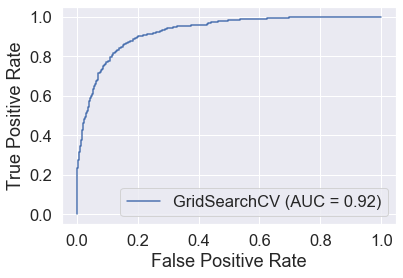

In [68]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_rf, X_test, y_test)

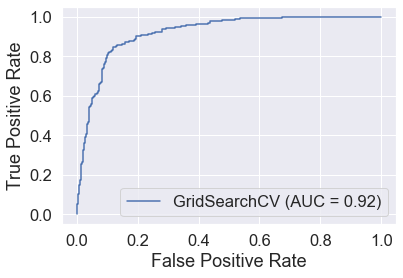

In [69]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_rf_res, X_res_test, y_res_test)

In [70]:
# Confusion matrix
print(confusion_matrix(y_test, y_pred = gs_rf.predict(X_test)))

[[1995   60]
 [ 204  207]]


In [71]:
# Confusion matrix
print(confusion_matrix(y_res_test, y_pred = gs_rf_res.predict(X_res_test)))

[[341  50]
 [ 57 316]]


In [74]:
sns.set(font_scale = 1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    
    fig, ax = plt.subplots(figsize = (7,7))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')

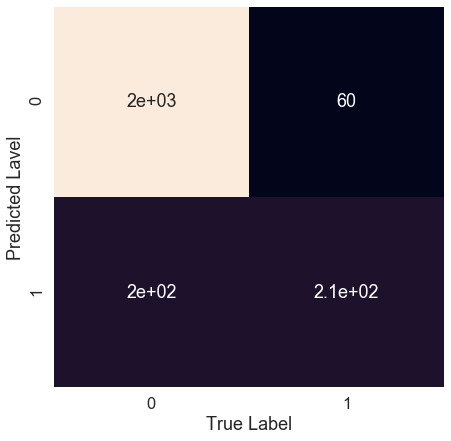

In [75]:
plot_conf_mat(y_test, y_preds)

Since this confusion matrix is from the imbalanced dataset, this confusion matrix is not very effective. We can see that there are a lot more true negatives than true positives, and false negatives than false positives. In this confusion matrix, we can see that the true positive value is close to the false negative value, which again is due to the dataset being imbalanced.

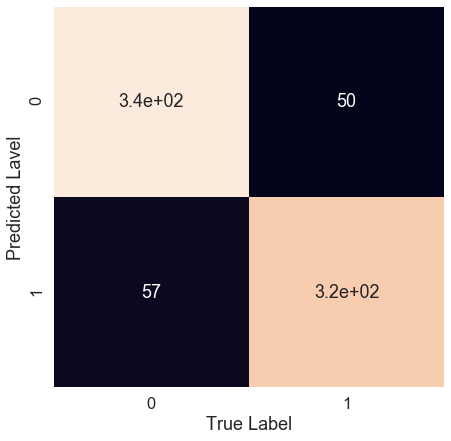

In [76]:
plot_conf_mat(y_res_test, y_res_preds)

Confusion matrix for a balanced dataset looks a lot better. This is an example why imbalanced dataset needs to be resolved.

##### Classification report

In [77]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2055
        True       0.78      0.50      0.61       411

    accuracy                           0.89      2466
   macro avg       0.84      0.74      0.77      2466
weighted avg       0.89      0.89      0.88      2466



In [78]:
print(classification_report(y_res_test, y_res_preds))

              precision    recall  f1-score   support

       False       0.86      0.87      0.86       391
        True       0.86      0.85      0.86       373

    accuracy                           0.86       764
   macro avg       0.86      0.86      0.86       764
weighted avg       0.86      0.86      0.86       764



Calculate evaluation metrics using cross validation

We're going to calculate accuracy, precision, recall, and f1 score of our model using cross-validation and to do so, we'll be using `cross_val_score()`.

In [79]:
gs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 18,
 'n_estimators': 830}

In [82]:
gs_rf_res.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 14,
 'n_estimators': 850}

In [80]:
clf = RandomForestClassifier(n_estimators=830,
                             max_depth=10,
                             min_samples_leaf=1,
                             min_samples_split=18)

In [83]:
clf_res = RandomForestClassifier(n_estimators=850,
                                 max_depth=10,
                                 min_samples_leaf=5,
                                 min_samples_split=14)

In [84]:
# Cross validated accuracy
cv_acc_res = cross_val_score(clf_res, 
                         X_resampled,
                         y_resampled)
cv_acc_res = np.mean(cv_acc_res)
cv_acc_res

0.8414453143762909

In [85]:
cv_acc = cross_val_score(clf,
                         X,
                         y)
cv_acc = np.mean(cv_acc)
cv_acc

0.8983779399837794

In [86]:
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

0.7377128743015622

In [87]:
cv_precision_res = cross_val_score(clf_res,
                                   X_resampled,
                                   y_resampled,
                                   scoring='precision')
cv_precision_res = np.mean(cv_precision_res)
cv_precision_res

0.8577504354012975

In [88]:
# Cross validated recall
cv_recall = cross_val_score(clf,
                         X, 
                         y,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

0.5408954116337552

In [89]:
# Cross validated recall
cv_recall_res = cross_val_score(clf_res,
                         X_resampled, 
                         y_resampled,
                         scoring='recall')
cv_recall_res = np.mean(cv_recall_res)
cv_recall_res

0.8165739099366505

In [90]:
# Cross validated f1-score
cv_f1 = cross_val_score(clf,
                         X, 
                         y,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

0.6188472438003556

In [91]:
# Cross validated f1-score
cv_f1_res = cross_val_score(clf_res,
                         X_resampled, 
                         y_resampled,
                         scoring='f1')
cv_f1_res = np.mean(cv_f1_res)
cv_f1_res

0.8342275892745578

In [92]:
# Visualize

cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index = [0])

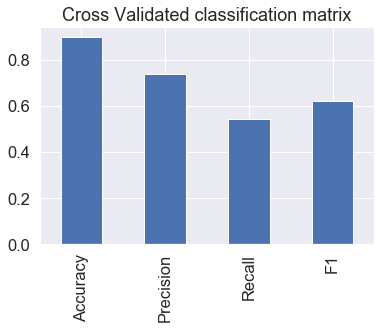

In [93]:
cv_metrics.T.plot.bar(title='Cross Validated classification matrix',
                      legend = False)

In [94]:
# Visualize

cv_metrics_res = pd.DataFrame({"Accuracy": cv_acc_res,
                           "Precision": cv_precision_res,
                           "Recall": cv_recall_res,
                           "F1": cv_f1_res},
                          index = [0])

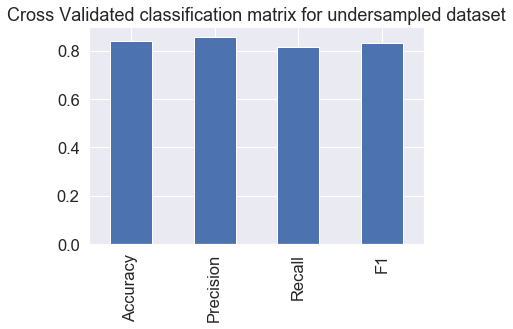

In [95]:
cv_metrics_res.T.plot.bar(title='Cross Validated classification matrix for undersampled dataset',
                      legend = False)

Notice that the evaluation scores are more stable with the undersampled datasets. This is because the original dataset is imbalanced.

The model trained with undersampled dataset can now be saved.

In [ ]:
from joblib import dump, load

#save model to file
dump(gs_rf_res, filename = "gs_random_forest_model_1.joblib")